In [52]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
colonnine = ["40", "44", "53", "54", "55", "57", "59", "60", "62", "63", "69", "70", "73", "74", "75", "76", "77", "78"]
secondi = 1262277040

In [3]:
combined_json = []
for colonnina in colonnine:
    print("Starting with colonnina {}".format(colonnina))
    r = requests.get("http://ipchannels.integreen-life.bz.it/origin-destination/rest/get-records?station={}&name=velocita%27&seconds={}".format(colonnina, secondi))
    combined_json += r.json()

Starting with colonnina 40
Starting with colonnina 44
Starting with colonnina 53
Starting with colonnina 54
Starting with colonnina 55
Starting with colonnina 57
Starting with colonnina 59
Starting with colonnina 60
Starting with colonnina 62
Starting with colonnina 63
Starting with colonnina 69
Starting with colonnina 70
Starting with colonnina 73
Starting with colonnina 74
Starting with colonnina 75
Starting with colonnina 76
Starting with colonnina 77
Starting with colonnina 78


In [87]:
original_df = pd.DataFrame(r.json())
original_df.head()

created_on      timestamp      value
0  1410608063000  1408981950000  31.576106
1  1410608063000  1408983750000   1.735859
2  1410608063000  1408984650000  31.204622
3  1410608063000  1408985550000  31.204622
4  1410608064000  1408987350000  36.838790

In [88]:
df = original_df.copy()

In [75]:
df = df.dropna()

In [89]:
df['timestamp'] = df['timestamp'] / 1000

In [90]:
df['created_on'] = df['created_on'] / 1000

In [9]:
df.head()

created_on     timestamp      value
0  1.410608e+09  1.408982e+09  31.576106
1  1.410608e+09  1.408984e+09   1.735859
2  1.410608e+09  1.408985e+09  31.204622
3  1.410608e+09  1.408986e+09  31.204622
4  1.410608e+09  1.408987e+09  36.838790

In [91]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [92]:
df.head()

created_on           timestamp      value
0  1.410608e+09 2014-08-25 15:52:30  31.576106
1  1.410608e+09 2014-08-25 16:22:30   1.735859
2  1.410608e+09 2014-08-25 16:37:30  31.204622
3  1.410608e+09 2014-08-25 16:52:30  31.204622
4  1.410608e+09 2014-08-25 17:22:30  36.838790

In [93]:
df['dow'] = df.timestamp.dt.dayofweek
df.head()

created_on           timestamp      value  dow
0  1.410608e+09 2014-08-25 15:52:30  31.576106    0
1  1.410608e+09 2014-08-25 16:22:30   1.735859    0
2  1.410608e+09 2014-08-25 16:37:30  31.204622    0
3  1.410608e+09 2014-08-25 16:52:30  31.204622    0
4  1.410608e+09 2014-08-25 17:22:30  36.838790    0

In [94]:
df = df[df.dow <= 4]

In [95]:
df.dow.value_counts()

4    4220
1    4138
3    4119
2    4065
0    4002
Name: dow, dtype: int64

In [96]:
df['hour'] = df.timestamp.dt.time
df.head()

created_on           timestamp      value  dow      hour
0  1.410608e+09 2014-08-25 15:52:30  31.576106    0  15:52:30
1  1.410608e+09 2014-08-25 16:22:30   1.735859    0  16:22:30
2  1.410608e+09 2014-08-25 16:37:30  31.204622    0  16:37:30
3  1.410608e+09 2014-08-25 16:52:30  31.204622    0  16:52:30
4  1.410608e+09 2014-08-25 17:22:30  36.838790    0  17:22:30

In [97]:
df = df[(df.timestamp.dt.hour > 5)&(df.timestamp.dt.hour < 22)]

In [98]:
df.hour.unique()

array([datetime.time(15, 52, 30), datetime.time(16, 22, 30),
       datetime.time(16, 37, 30), datetime.time(16, 52, 30),
       datetime.time(17, 22, 30), datetime.time(17, 37, 30),
       datetime.time(17, 52, 30), datetime.time(18, 37, 30),
       datetime.time(18, 52, 30), datetime.time(19, 22, 30),
       datetime.time(19, 37, 30), datetime.time(21, 37, 30),
       datetime.time(6, 37, 30), datetime.time(6, 52, 30),
       datetime.time(7, 7, 30), datetime.time(7, 22, 30),
       datetime.time(7, 37, 30), datetime.time(7, 52, 30),
       datetime.time(8, 7, 30), datetime.time(8, 22, 30),
       datetime.time(8, 37, 30), datetime.time(8, 52, 30),
       datetime.time(9, 7, 30), datetime.time(9, 22, 30),
       datetime.time(9, 37, 30), datetime.time(9, 52, 30),
       datetime.time(10, 7, 30), datetime.time(10, 22, 30),
       datetime.time(10, 37, 30), datetime.time(10, 52, 30),
       datetime.time(11, 7, 30), datetime.time(11, 22, 30),
       datetime.time(11, 37, 30), datetime.

In [17]:
df = df[df.timestamp.dt.year == 2016]

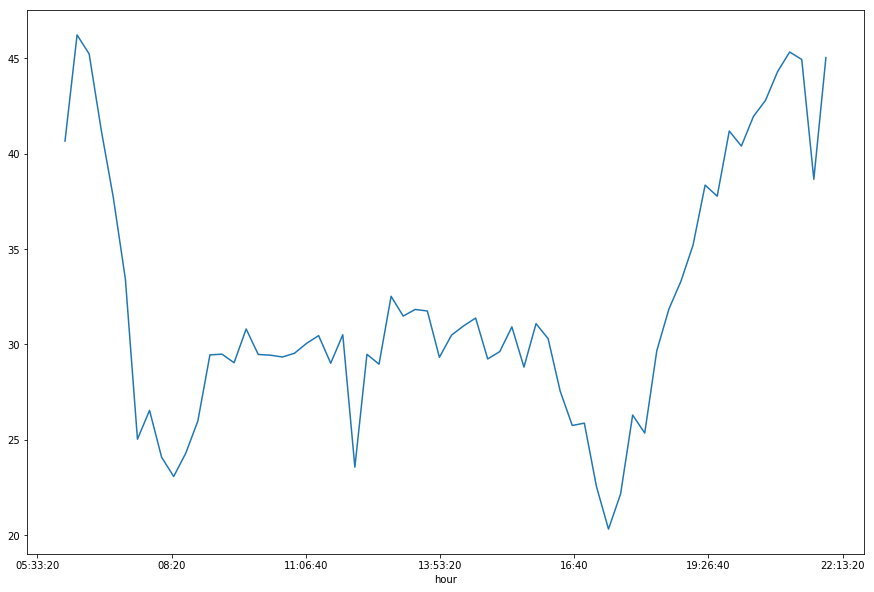

In [51]:
gb = df.groupby('hour')
values_by_time = gb.mean()['value']
values_by_time.plot()

In [57]:
values_by_time.to_json()

'{"06:07:30":40.6666348474,"06:22:30":46.2369992837,"06:37:30":45.2367134007,"06:52:30":41.2479174789,"07:07:30":37.7101048317,"07:22:30":33.4274007009,"07:37:30":25.030891779,"07:52:30":26.5434611315,"08:07:30":24.0839555488,"08:22:30":23.0770496955,"08:37:30":24.2987660151,"08:52:30":25.9859572828,"09:07:30":29.4547546259,"09:22:30":29.4916656017,"09:37:30":29.0424169198,"09:52:30":30.8106499925,"10:07:30":29.4758526709,"10:22:30":29.4386009777,"10:37:30":29.3433950372,"10:52:30":29.5395248312,"11:07:30":30.0571684975,"11:22:30":30.464208621,"11:37:30":29.0166844818,"11:52:30":30.5096898804,"12:07:30":23.567344433,"12:22:30":29.4835463789,"12:37:30":28.9669567122,"12:52:30":32.5265978108,"13:07:30":31.4900923526,"13:22:30":31.8371475896,"13:37:30":31.7558689227,"13:52:30":29.3265521125,"14:07:30":30.4883666446,"14:22:30":30.9738245168,"14:37:30":31.3866001019,"14:52:30":29.2398508721,"15:07:30":29.6283016544,"15:22:30":30.922894922,"15:37:30":28.8135505859,"15:52:30":31.0911687975,"1

In [65]:
df_peak_hours = df[(8 < df.timestamp.dt.hour)&(df.timestamp.dt.hour<18)]

In [72]:
ggb = df_peak_hours.groupby('hour')
peak_hours_values = ggb['value'].mean()
peak_hours_values.std()

2.874026630870042

In [73]:
original_df.head()

created_on      timestamp      value
0  1410608063000  1408981950000  31.576106
1  1410608063000  1408983750000   1.735859
2  1410608063000  1408984650000  31.204622
3  1410608063000  1408985550000  31.204622
4  1410608064000  1408987350000  36.838790